In [314]:
%reset
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt

N1 = 1.0
N2 = 1.0
N3 = 1.0
chi12 = 5.0
chi13 = 1.0
chi23 = 1.0

chi1 = 0.5*(chi12 + chi13 - chi23)
chi2 = 0.5*(chi12 + chi23 - chi13)
chi3 = 0.5*(chi13 + chi23 - chi12)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [315]:
def equations(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2
    
#     psi1 = N1 * phi1 / (1. - 2. * chi1 * N1 * phi1)
#     psi2 = N2 * phi2 / (1. - 2. * chi2 * N2 * phi2)
#     psi3 = N3 * phi3 / (1. - 2. * chi3 * N3 * phi3)

   
    f1 = phi1*(1.-2.*chi2*phi2)*(1.-2.*chi3*phi3) +\
         phi2*(1.-2.*chi1*phi1)*(1.-2.*chi3*phi3) +\
         N3*phi3*(1.-2.*chi1*phi1)*(1.-2.*chi2*phi2)
    f2 = phi1*(1.-2.*chi2*phi2)**3.*(1.-2.*chi3*phi3)**3. +\
         phi2*(1.-2.*chi1*phi1)**3.*(1.-2.*chi3*phi3)**3. +\
         N3*phi3*(1.-2.*chi1*phi1)**3.*(1.-2.*chi2*phi2)**3.
    
    return (f1,f2)

def f(p):
    return abs(sum(np.array(equations(p))**2.)-0.)

PLEASE NOTE: FSOLVE FINDS THE CLOSEST ROOT TO THE FIRST GUESS

GRID IS DEFINED TO SEARCH ALL 4 REGIONS CLOSE TO THE ROOTS

ONE WAY TO FIND ALL THE ROOTS, IF YOU HAD NO IDEA ABOUT THE FIRST GUESS, IS

TO MESH THE SYSTEM, LIKE THE WAY BALAJI DID, AND SEARCH ALL THE REGIONS

calculation for obtaining the critical point

In [316]:
x_dim = np.arange(0.023, 0.99, 0.03)
y_dim = x_dim

###3D Grid
# z_dim = x_dim
# grid = np.zeros((len(x_dim)*len(y_dim)*len(z_dim), 3))

# m = 0
# for i in range(len(x_dim)):
#     for j in range(len(y_dim)):
#         for k in range(len(z_dim)):
#             grid[m,:] = x_dim[i], y_dim[j], z_dim[k]
#             m+=1

###2D Grid
grid = np.zeros((len(x_dim)*len(y_dim), 2))

m = 0
for i in range(len(x_dim)):
    for j in range(len(y_dim)):
        grid[m,:] = x_dim[i], y_dim[j]
        m+=1

Following will solve the equations with fsolve function

In [317]:
roots =[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(grid))):
    initial_guess = optimize.fmin(f, (grid[i]))
    pr = optimize.fsolve(equations, initial_guess)
    if np.sqrt(np.sum(np.array(equations(pr))**2.))<1e-11:
        roots.append(pr)
roots = np.array(roots)
r3 = 1.-(roots[:,0]+roots[:,1])
roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0) &\
              ((1.-roots[:,0]-roots[:,1])>=0.0) & ((1.-roots[:,0]-roots[:,1])<=1.0))]

rounded_root = stats.mode(np.round(roots, 3))[0]

Optimization terminated successfully.
         Current function value: 1.068703
         Iterations: 28
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: 1.068703
         Iterations: 42
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 53
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 118
         Function evaluations: 217
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 125
         Function evaluations: 229
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 123
         Function evaluations: 230
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 121
         Function evaluations: 229
Optimization terminated su

In [318]:
print("(phi1, phi2, phi3):", (rounded_root[0,0], rounded_root[0,1], 1.-(rounded_root[0,0]+rounded_root[0,1])))

(phi1, phi2, phi3): (0.2, 0.2, 0.6)


Let's plot "equations" function to see the result:

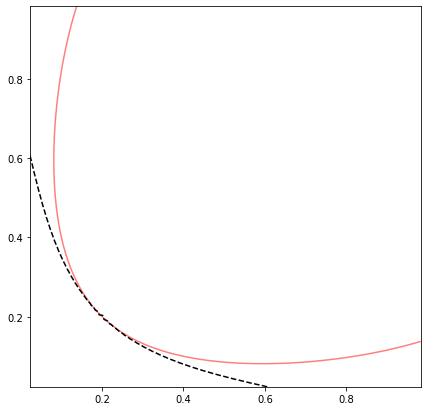

In [319]:
###
x, y = np.meshgrid(
    np.arange(.023, .99, 0.01),
    np.arange(.023, .99, 0.01))
plt.figure(figsize=(7,7))
lev = np.arange(-1, 1, 0.1)
Eq1_fig = plt.contour(x, y,
             equations([x, y])[0], 
             levels=[0], alpha=0.5, cmap='rainbow_r')
Eq2_fig = plt.contour(x, y,
             equations([x, y])[1],
            levels=[0], alpha=1, cmap='gray', linestyles='dashed')

plt.show()

For obtaining the spinodal points, we do not need to solve any equations, because it can be found from the previous plot. Note that equation for the spinodal points is exactly the red curve.

In [320]:
# line_Eq1 = []
# line_Eq2 = []
# for line in Eq1_fig.collections[0].get_paths():
#     line_Eq1.append(line.vertices)
# for line in Eq2_fig.collections[0].get_paths():
#     line_Eq2.append(line.vertices)
# # line_Eq1 = np.reshape(line_Eq1, (-1, 2))
# # line_Eq2 = np.reshape(line_Eq2, (-1, 2))

# points_sp = np.empty((len(line_Eq1[0][:,0]),3))
# points_sp[:,0] = line_Eq1[0][:,0]
# points_sp[:,1] = line_Eq1[0][:,1]
# points_sp[:,2] = 1. - (line_Eq1[0][:,0] + line_Eq1[0][:,1])
# points_sp = points_sp[((points_sp[:,2]>=0.0) & (points_sp[:,2]<=1.0))]


x_dim = np.arange(0.023, 0.99, 0.001)
grid = np.zeros((len(x_dim)**2, 2))

c = 0
for i in range(len(x_dim)):
    for j in range(len(x_dim)):
        grid[c,:] = x_dim[i], x_dim[j]
        c+=1

def equation_spinodal(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2


    f1 = phi1*(1.0-2.0*chi2*phi2)*(1.0-2.0*chi3*phi3) +\
         phi2*(1.0-2.0*chi1*phi1)*(1.0-2.0*chi3*phi3) +\
         N3*phi3*(1.0-2.0*chi1*phi1)*(1.0-2.0*chi2*phi2)

    return (f1)

roots_spinodal = []
for i in range(len(grid)):
    aaa = equation_spinodal(grid[i])
    if abs(aaa)<0.0001: 
        roots_spinodal.append(grid[i])
roots_spinodal = np.asarray(roots_spinodal)
roots_spinodal = roots_spinodal[((roots_spinodal[:,0]>=0.0) & (roots_spinodal[:,0]<=1.0) & (roots_spinodal[:,1]>=0.0) & \
                                 (roots_spinodal[:,1]<=1.0) & ((1.-roots_spinodal[:,0]-roots_spinodal[:,1])>=0.0) & \
                                 ((1.-roots_spinodal[:,0]-roots_spinodal[:,1])<=1.0))]
points_sp = roots_spinodal

In [321]:
x_dim = np.arange(0.023, 0.99, 0.1)
y_dim = x_dim
z_dim = x_dim
skimmer = np.arange(0.023, 0.99, 0.05)
binodal_points = []
other_roots = []
all_roots = []

def ln_t(x0):
    asd = 0.0
    for i in range(1,30):
        asd = asd - (-1.0)**i * (1/i)*(x0-1.0)**i
    return asd
from tqdm.notebook import tqdm
for skim in tqdm(skimmer):
    
    grid = np.zeros((len(x_dim)*len(y_dim)*len(z_dim), 4))

    c = 0
    for i in range(len(x_dim)):
        for j in range(len(y_dim)):
            for k in range(len(z_dim)):
                grid[c,:] = x_dim[i], y_dim[j], z_dim[k], skim
                c+=1
            
    def equations2(PHI):
        phi1_1, phi2_1, phi1_2, phi2_2 = PHI
        phi3_1 = 1.0 - phi1_1 - phi2_1
        phi3_2 = 1.0 - phi1_2 - phi2_2


        f1 = chi12*(phi2_1**2 - phi2_2**2) + \
            chi13*(phi3_1**2 - phi3_2**2) + \
            np.log(phi1_1) - np.log(phi1_2) + \
            (phi3_1 - phi3_2)*(1-1/N3) + \
            (chi12+chi13-chi23) * (phi2_1*phi3_1 - phi2_2*phi3_2)

        f2 = np.log(phi2_1) - np.log(phi2_2) + \
            chi12*((phi2_1 - 1)**2 - (phi2_2-1)**2) + \
            chi13*(phi3_1**2 - phi3_2**2) + \
            1/N3 * (phi3_2 - phi3_1) + \
            phi3_1 * (1 + (phi2_1 - 1)*(chi12+chi13) + chi23 - phi2_1*chi23) - \
            phi3_2 * (1 + (phi2_2 - 1)*(chi12+chi13) + chi23 - phi2_2*chi23)

        f3 = np.log(phi3_1) - np.log(phi3_2) + \
            phi3_2 - phi3_1 + \
            N3 * (chi13 * (phi3_1**2 - phi3_2**2) + \
            (1-2*chi13)*(phi3_1-phi3_2) +\
            (chi12+chi13-chi23)*(phi3_1*phi2_1 - phi3_2*phi2_2)) + \
            N3 * (phi2_1*(chi12*phi2_1-chi12-chi13+chi23)) - \
            N3 * (phi2_2*(chi12*phi2_2-chi12-chi13+chi23))

#         f1 = chi12*(phi2_1**2 - phi2_2**2) + \
#              chi13*(phi3_1**2 - phi3_2**2) + \
#              ln_t(phi1_1) - ln_t(phi1_2) + \
#              (phi3_1 - phi3_2)*(1-1/N3) + \
#              (chi12+chi13-chi23) * (phi2_1*phi3_1 - phi2_2*phi3_2)

#         f2 = ln_t(phi2_1) - ln_t(phi2_2) + \
#              chi12*((phi2_1 - 1)**2 - (phi2_2-1)**2) + \
#              chi13*(phi3_1**2 - phi3_2**2) + \
#              1/N3 * (phi3_2 - phi3_1) + \
#              phi3_1 * (1 + (phi2_1 - 1)*(chi12+chi13) + chi23 - phi2_1*chi23) - \
#              phi3_2 * (1 + (phi2_2 - 1)*(chi12+chi13) + chi23 - phi2_2*chi23)

#         f3 = ln_t(phi3_1) - ln_t(phi3_2) + \
#              phi3_2 - phi3_1 + \
#              N3 * (chi13 * (phi3_1**2 - phi3_2**2) + \
#              (1-2*chi13)*(phi3_1-phi3_2) +\
#              (chi12+chi13-chi23)*(phi3_1*phi2_1 - phi3_2*phi2_2)) + \
#              N3 * (phi2_1*(chi12*phi2_1-chi12-chi13+chi23)) - \
#              N3 * (phi2_2*(chi12*phi2_2-chi12-chi13+chi23))

        f4 = phi2_2 - skim

        return (f1,f2,f3,f4)
    
    def f(p):
        return abs(sum(np.array(equations2(p))**2.)-0.)


    roots =[]
    for i in range(len(grid)):
#         initial_guess = optimize.fmin(f, grid[i])
        pr = optimize.fsolve(equations2, grid[i])
        if (np.sqrt(np.sum(np.array(equations2(pr))**2.)))<1e-11:
            roots.append(pr)
    roots = np.asarray(roots)

    if roots.size > 0:
            roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0) &\
                  ((1.-roots[:,0]-roots[:,1])>=0.0) & ((1.-roots[:,0]-roots[:,1])<=1.0))]
            new_round_root = np.round(roots,2)
            temp0 = (np.cross(new_round_root[:,0:2],new_round_root[:,2:4]))!=0.0
            if temp0.any():
                temp = np.unique(new_round_root[temp0,0:2], axis=0)
                for i0 in range(len(temp)):
                    binodal_points.append(temp[i0])
                    
    all_roots.append(roots)
    
binodal_points = np.asarray(binodal_points)


E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log
E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log
E:\python_setup_files\installation_Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log


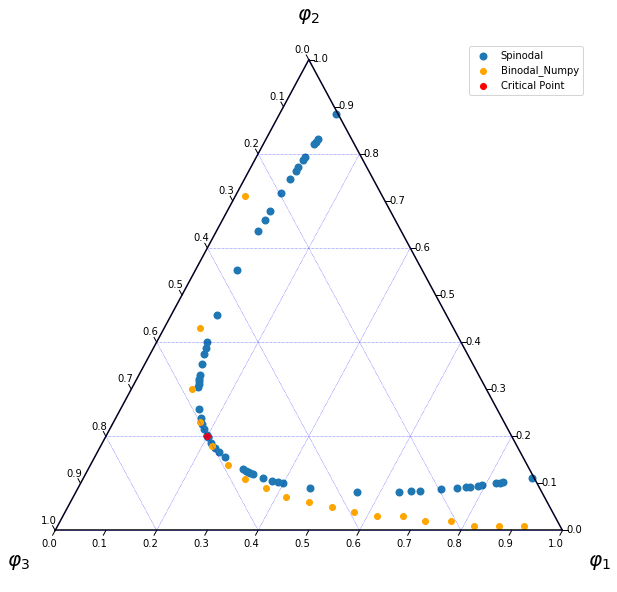

In [325]:
import ternary

indices = []
for i in range(len(binodal_points)):
    if equations(binodal_points[i])[0]>0.0:
        indices.append(i)
    

fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(10, 10)


tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.right_corner_label("$\\varphi_1$", fontsize=20)
tax.top_corner_label("$\\varphi_2$", fontsize=20)
tax.left_corner_label("$\\varphi_3$", fontsize=20)
tax.gridlines(multiple=0.2, color="blue")

tax.scatter(points_sp, linewidth=2.0, label="Spinodal")
# tax.scatter(binodal_points[(indices)], marker='o', color='yellow', label="Binodal")
tax.scatter(binodal_points, marker='o', color='orange', label="Binodal_Numpy")
tax.scatter([(rounded_root[0,0], rounded_root[0,1] ,1.-sum(rounded_root[0]))], marker='o', color='red', 
            label="Critical Point")



tax.legend()
tax.show()

fig.savefig(r'C:\Users\Ehsan\Desktop\plot.tiff',dpi=600)

In [323]:
binodal_points

array([[0.02, 0.71],
       [0.07, 0.43],
       [0.12, 0.3 ],
       [0.17, 0.23],
       [0.22, 0.18],
       [0.27, 0.14],
       [0.32, 0.11],
       [0.37, 0.09],
       [0.42, 0.07],
       [0.47, 0.06],
       [0.52, 0.05],
       [0.57, 0.04],
       [0.62, 0.03],
       [0.67, 0.03],
       [0.72, 0.02],
       [0.77, 0.02],
       [0.82, 0.01],
       [0.87, 0.01],
       [0.92, 0.01]])